In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cleaned_merged_data2.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (346,347,348,349,350,351,354,355,356,357,359) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fips_block_group,state,state_name,county,county_name,tract,block_group,flag,land_area,aian_land,...,federal_register_url,geocode_source,latitude,longitude,site_epa_id,site_name,site_narrative_url,site_progress_url,site_score,site_text
0,10010201001,1.0,Alabama,1.0,Autauga County,20100.0,1.0,0.0,1.638,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
1,10010201002,1.0,Alabama,1.0,Autauga County,20100.0,2.0,0.0,2.150,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
2,10010202001,1.0,Alabama,1.0,Autauga County,20200.0,1.0,0.0,0.795,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
3,10010202002,1.0,Alabama,1.0,Autauga County,20200.0,2.0,0.0,0.495,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
4,10010203001,1.0,Alabama,1.0,Autauga County,20300.0,1.0,0.0,1.493,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0


In [3]:
selected_features = df.loc[:, df.columns != 'has_superfund']
selected_features.head()

,fips_block_group,state,state_name,county,county_name,tract,block_group,flag,land_area,aian_land,...,federal_register_url,geocode_source,latitude,longitude,site_epa_id,site_name,site_narrative_url,site_progress_url,site_score,site_text
0,10010201001,1.0,Alabama,1.0,Autauga County,20100.0,1.0,0.0,1.638,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
1,10010201002,1.0,Alabama,1.0,Autauga County,20100.0,2.0,0.0,2.150,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
2,10010202001,1.0,Alabama,1.0,Autauga County,20200.0,1.0,0.0,0.795,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
3,10010202002,1.0,Alabama,1.0,Autauga County,20200.0,2.0,0.0,0.495,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0
4,10010203001,1.0,Alabama,1.0,Autauga County,20300.0,1.0,0.0,1.493,0.0,...,0,0,0.0,0.0,0,0,0,0,0.0,0


In [4]:
selected_features = selected_features.loc[:, selected_features.columns != 'latitude'] 

In [5]:
selected_features = selected_features.loc[:, selected_features.columns != 'longitude'] 

In [6]:
selected_features = selected_features.loc[:, selected_features.columns != 'fips_full'] 

In [7]:
selected_features = selected_features.loc[:, selected_features.columns != 'site_score'] 

In [8]:
selected_features = selected_features.loc[:, selected_features.columns != 'fips_block_group']

In [9]:
cols_to_remove = []

for col in selected_features.columns:
    try:
        _ = selected_features[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
selected_features = selected_features[[col for col in selected_features.columns if col not in cols_to_remove]]

Couldn't covert state_name to float
Couldn't covert county_name to float
Couldn't covert address to float
Couldn't covert city to float
Couldn't covert date_added to float
Couldn't covert federal_facility_ind to float
Couldn't covert federal_register_url to float
Couldn't covert geocode_source to float
Couldn't covert site_epa_id to float
Couldn't covert site_name to float
Couldn't covert site_narrative_url to float
Couldn't covert site_progress_url to float
Couldn't covert site_text to float


In [10]:
X = selected_features
y = df[['has_superfund']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.993739376599181
Testing Data Score: 0.993866477942911


In [14]:
coef = model.coef_[0]
col_names = X.columns
feat_lst = list(zip(col_names, coef))
summary_df = pd.DataFrame({'feature_name': col_names, 'correl': coef})
summary_df.sort_values(['correl'], ascending=False)

,feature_name,correl
163,med_house_value_bg_acs_09_13,1.174500e-05
329,avg_agg_house_value_acs_09_13,4.979979e-06
69,college_acs_09_13,1.710389e-08
130,aggregate_hh_inc_acs_09_13,1.324133e-08
167,aggr_house_value_acs_09_13,5.912152e-09
...,...,...
164,med_house_value_bg_acsmoe_09_13,-1.366092e-05
165,med_house_value_tr_acs_09_13,-1.367014e-05
126,med_hhd_inc_bg_acs_09_13,-1.912814e-05
299,avg_agg_hh_inc_acs_09_13,-2.275312e-05


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              }
grid = GridSearchCV(model, param_grid, verbose=2)

In [16]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elaps

[CV] .............................................. C=1, total=   6.2s
[CV] C=1 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............................................. C=1, total=   7.0s
[CV] C=1 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............................................. C=1, total=   6.7s
[CV] C=1 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............................................. C=1, total=   7.4s
[CV] C=1 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............................................. C=1, total=   6.4s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............................................. C=5, total=   6.5s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............................................. C=5, total=   6.3s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............................................. C=5, total=   5.5s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............................................. C=5, total=   5.6s
[CV] C=5 .............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .............................................. C=5, total=   5.7s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................................. C=10, total=   5.4s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................................. C=10, total=   5.8s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................................. C=10, total=   5.6s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................................. C=10, total=   5.6s
[CV] C=10 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................................. C=10, total=   5.7s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................................. C=50, total=   5.4s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................................. C=50, total=   5.9s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................................. C=50, total=   5.6s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ............................................. C=50, total=   5.5s
[CV] C=50 ............................................................


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished


[CV] ............................................. C=50, total=   5.4s


/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlhmackensen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [1, 5, 10, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [17]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 5}
0.9937575235888924


In [18]:
from sklearn.metrics import classification_report
predictions = grid.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     54775
         1.0       0.00      0.00      0.00       332

    accuracy                           0.99     55107
   macro avg       0.50      0.50      0.50     55107
weighted avg       0.99      0.99      0.99     55107



In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.008464998621481092
Testing Score: 0.002289887424806958


Text(0.5, 1.0, 'Residual Plot')

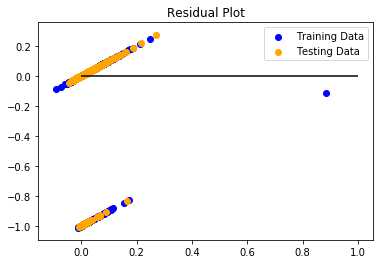

In [21]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [22]:
coef = model.coef_[0]
col_names = X.columns
feat_lst = list(zip(col_names, coef))
summary_df = pd.DataFrame({'feature_name': col_names, 'correl': coef})
summary_df.sort_values(['correl'], ascending=False)

,feature_name,correl
189,pct_females_cen_2010,0.391749
186,pct_males_cen_2010,0.391700
234,pct_pop_5yrs_over_acs_09_13,0.382087
193,pct_pop_under_5_acs_09_13,0.353819
271,pct_mrdcple_hhd_cen_2010,0.256719
...,...,...
185,pct_rural_pop_cen_2010,-0.350625
190,pct_females_acs_09_13,-0.353731
187,pct_males_acs_09_13,-0.353761
310,pct_owner_occp_hu_cen_2010,-0.393265
